<img src="https://www.stclaircollege.ca/sites/default/files/scc-open-graph-image.jpg" width=250 align="center"> 
<img src="https://i2.wp.com/thejournalofmhealth.com/wp-content/uploads/2019/07/Sensyne-Health-Partners-with-Bayer-to-Accelerate-New-Treatments-for-Cardiovascular-Disease.jpg?resize=777%2C437&ssl=1" width=235 align="center"> 

----------------------------------------------------------
----------------------------------------------------------

w0749349@myscc.ca	Mohit Kumar  <br>
w0749348@myscc.ca	Divya Rao <br>
w0743552@myscc.ca	Julia Kumala <br>
w0750311@myscc.ca Venkata Naga Sravani<br>
w0728352@myscc.ca	Luis Rafael	Silva Moreno<br> 

----------------------------------------------------------

# Objectives
*   The ability to identify features that could influence or predict the target outcome, in this case, the survival of heart failure patients.
----------------------------------------------------------
#1. Data Import
Data set is collected from Kaggle. The link to the dataset is:
https://www.kaggle.com/sulianova/cardiovascular-disease-dataset




In [ ]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#importing data 
# cardio = pd.read_csv('cardio_train.csv', delimiter = ";" ) 
cardio = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQPk4HEY_eZtC8wa6LH8B5X-PuGyToRnsxJW_BCBsFq_BJI58oJDJQna_2EHvcQWzHQcikSbo5Z8-NN/pub?gid=1384739927&single=true&output=csv', delimiter = ";" ) 
print(cardio)

          id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
0          0  18393       2     168    62.0  ...     1      0     0       1       0
1          1  20228       1     156    85.0  ...     1      0     0       1       1
2          2  18857       1     165    64.0  ...     1      0     0       0       1
3          3  17623       2     169    82.0  ...     1      0     0       1       1
4          4  17474       1     156    56.0  ...     1      0     0       0       0
...      ...    ...     ...     ...     ...  ...   ...    ...   ...     ...     ...
69995  99993  19240       2     168    76.0  ...     1      1     0       1       0
69996  99995  22601       1     158   126.0  ...     2      0     0       1       1
69997  99996  19066       2     183   105.0  ...     1      0     1       0       1
69998  99998  22431       1     163    72.0  ...     2      0     0       0       1
69999  99999  20540       1     170    72.0  ...     1      0     0       1 

#2. Data Overview

In [ ]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#looking at the variables and the datatypes
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#Checking sample statistics
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#checking for missing values
cardio.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
cardio.shape

(70000, 13)

# 3. Data Cleaning

In [ ]:
#Checking for Duplicates
duplicates = len(cardio) - len(cardio.drop(['id'],axis=1).drop_duplicates())
cardio.drop(['id'],axis=1,inplace=True)
cardio.drop_duplicates(inplace=True)
print(f'{duplicates} duplicate records dropped.')

24 duplicate records dropped.


In [ ]:
cardio.drop_duplicates().head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
cardio.shape

(69976, 12)

In [ ]:

# Replacing the gender
cardio['gender'].replace(1, 'Female', inplace=True)
cardio['gender'].replace(2, 'Male', inplace = True)
# Changing the age column from days to years
cardio['Age_in_years'] = (cardio['age']/365).round().astype('int')
cardio.drop('age',axis=1,inplace=True)
# Replacing the cholesterol 
cardio['cholesterol'].replace(1, 'Normal', inplace=True)
cardio['cholesterol'].replace(2, 'Above Normal', inplace=True)
cardio['cholesterol'].replace(3, 'High', inplace=True)
# Replacing the glucose
cardio['gluc'].replace(1, 'Normal', inplace=True)
cardio['gluc'].replace(2, 'Above Normal', inplace=True)
cardio['gluc'].replace(3, 'High', inplace=True)
# Replacing the Smoke
cardio['smoke'].replace(0, 'No', inplace=True)
cardio['smoke'].replace(1, 'Yes', inplace=True)
# Replacing the Alcohol
cardio['alco'].replace(0, 'No', inplace=True)
cardio['alco'].replace(1, 'Yes', inplace=True)
# Replacing the Active
cardio['active'].replace(0, 'No', inplace=True)
cardio['active'].replace(1, 'Yes', inplace=True)
# Replacing the Cardio variable
cardio['cardio'].replace(0, 'No', inplace=True)
cardio['cardio'].replace(1, 'Yes', inplace=True)
cardio.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age_in_years
0,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No,50
1,Female,156,85.0,140,90,High,Normal,No,No,Yes,Yes,55
2,Female,165,64.0,130,70,High,Normal,No,No,No,Yes,52
3,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,48
4,Female,156,56.0,100,60,Normal,Normal,No,No,No,No,48


In [ ]:
#re-arranging the columns 
cardio=cardio.reindex(columns= ['Age_in_years','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio'])
cardio.head()

,Age_in_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No
1,55,Female,156,85.0,140,90,High,Normal,No,No,Yes,Yes
2,52,Female,165,64.0,130,70,High,Normal,No,No,No,Yes
3,48,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes
4,48,Female,156,56.0,100,60,Normal,Normal,No,No,No,No


In [ ]:
#changing the column names
cardio.columns = ['Age_in_years','Gender','Height (cm)','Weight (kg)','Ap_hi','Ap_lo','Cholestrol','Glucose','Smoke','Alcohol','Active','Cardio']
cardio.head()

,Age_in_years,Gender,Height (cm),Weight (kg),Ap_hi,Ap_lo,Cholestrol,Glucose,Smoke,Alcohol,Active,Cardio
0,50,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No
1,55,Female,156,85.0,140,90,High,Normal,No,No,Yes,Yes
2,52,Female,165,64.0,130,70,High,Normal,No,No,No,Yes
3,48,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes
4,48,Female,156,56.0,100,60,Normal,Normal,No,No,No,No


In [ ]:
#Exporting the data set
df = pd.DataFrame(cardio)
df.to_csv('cardio.csv', index=False)

## 4. Brief look at the correlation

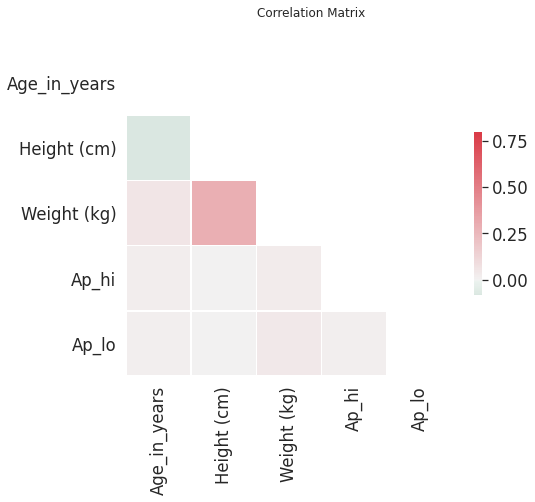

In [ ]:
# Set Background
import seaborn as sns
sns.set(style = 'white', font_scale =1.5)
# Compute the matrix
corr = df.corr()
# Generate the mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
f.suptitle("Correlation Matrix", fontsize = 12)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Comment:**

The plot above supports the correlation that happens between Height and Weight. This leads us to analyze in more detail te the corresponding Body Mass Index of the individuals. Perhaps this influence the target variable. 

# 4. Exploratory analysis

Understanding the dataset

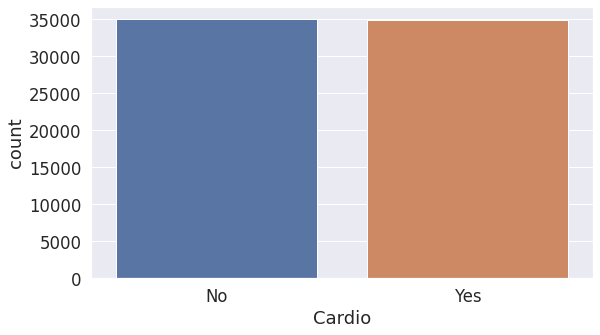

In [ ]:
# checking if data is balanced
from matplotlib import rcParams
sb.set(font_scale=1.5)  
rcParams['figure.figsize'] = 9, 5
sb.countplot(x='Cardio', data = df)

**Comment:**
From the above plot, we can see that the data is balanced

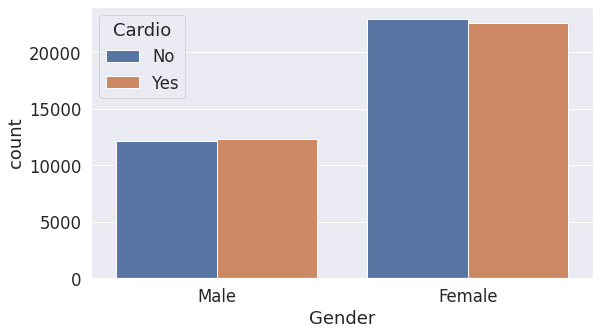

In [ ]:
# Checking the data based on Gender
from matplotlib import rcParams
sb.set(font_scale=1.5)  
rcParams['figure.figsize'] = 9, 5
sb.countplot(x='Gender', hue='Cardio', data = df)

**Comment:** From the above graph we can see that there is not much of difference between female and male at the chance of getting CVD. We will make further analysis to see if target variable depends on gender.

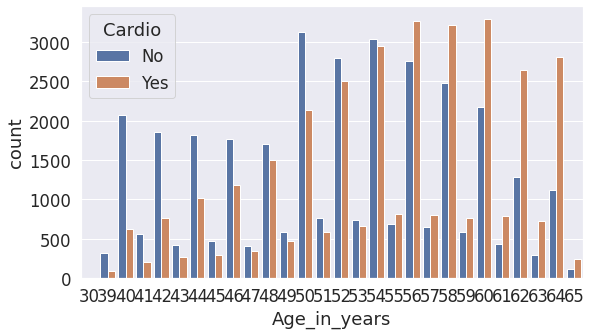

In [ ]:
# Checking the onset of cardio vascular disease based on age?
sb.countplot(x='Age_in_years', hue='Cardio', data = df)

**Comment:** From the above graph we can clearly see that from age 55, people with presence of cardio vascular disease are more when compared to people with absence of CVD. So from age 55, people should get checked for CVD and take preventive measures to avoid it.

In [ ]:
cardio.describe()

,Age_in_years,Height (cm),Weight (kg),Ap_hi,Ap_lo
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.338945,164.359152,74.208519,128.820453,96.636261
std,6.765633,8.211218,14.397211,154.037729,188.504581
min,30.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000


**Comment:** From the above sample statistics we can see that the minimum weight is 10kg and minimum height is 55cm which are impossible values for a human. So, we are making detailed univariate analysis

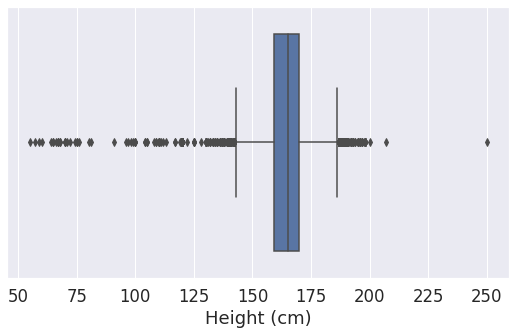

In [ ]:
# Understanding Height variable using boxplot
sb.boxplot(x= 'Height (cm)', data= cardio)

**Comment:** From the above plot we can clearly see that there are outliers in height variable. There are people who are in between 50 and 75cm that is they are less than 2.5 feet who could be children and people who are 250 cm, that is 8.2 ft which is likely impossible. So we will remove these outliers by doing more analysis.

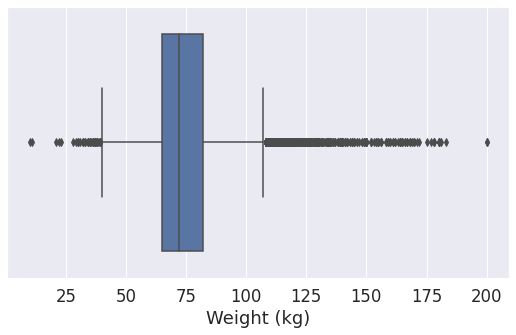

In [ ]:
# Understanding Weight variable using boxplot
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 5
sb.boxplot(x= 'Weight (kg)', data = cardio)

**Comment:** From the above plot we can clearly see that there are outliers in weight variable. There are people who are less than 25kg which is incorrect. So we need to remove these outliers with proper analysis.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


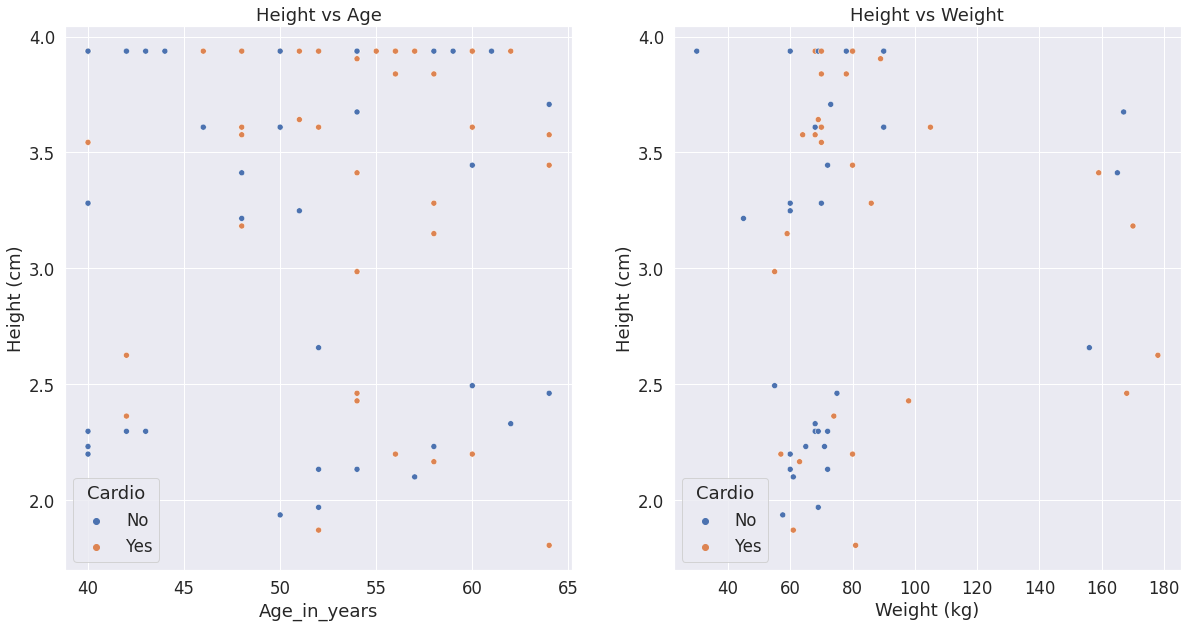

In [ ]:
#Plotting Height vs Age, Height vs Weight where the height of individuals is less than 4 feet.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sb.scatterplot(cardio['Age_in_years'],cardio['Height (cm)'][(cardio['Height (cm)']*0.0328084)<4]*0.0328084,hue=cardio['Cardio'],ax=ax1)
ax1.set_title('Height vs Age')
sb.scatterplot(cardio['Weight (kg)'],cardio['Height (cm)'][(cardio['Height (cm)']*0.0328084)<4]*0.0328084,hue=cardio['Cardio'],ax=ax2)
ax2.set_title('Height vs Weight')
plt.show()

**Comment:** We have converted the height in cms to feet for better understanding. We can see from the above plots that people below 4 foot in height are mostly aged above 40 and have a weight above 40kg mostly. This confirms that, they are not children. We are deleting these records from our data as they are outliers.

In [ ]:
# Converting height in cms to feet.
cardio['Height (ft)'] = cardio['Height (cm)']*0.0328084 
filt =(cardio['Height (ft)']>8) | (cardio['Height (ft)']<3)
cardio.drop(index = list(cardio[filt].index),inplace=True)
print(f'Dataset: {cardio.shape}')

Dataset: (69950, 13)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


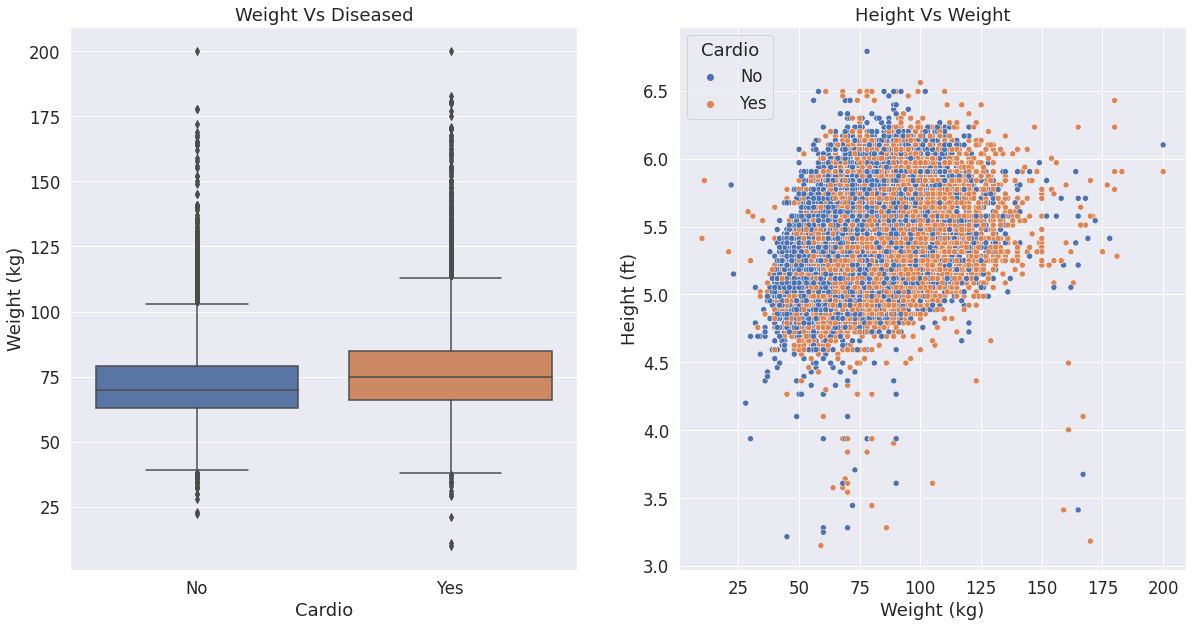

In [ ]:
#Plot to check abnormalities in the data set using height and weight variables
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sb.boxplot(cardio['Cardio'],(cardio['Weight (kg)']),ax=ax1)
ax1.set_title('Weight Vs Diseased')
sb.scatterplot(cardio['Weight (kg)'],cardio['Height (ft)'],ax=ax2,hue=cardio['Cardio'])
ax2.set_title('Height Vs Weight')
plt.show()

**Comment:** From the above plots we can see that there are individuals with more than 155 kgs of weight with height less than 4.5 feet which is a bit abnormal. There are people less than 25kg of weight and more than 175 kg of weight which looks like an outlier. We will eliminate all these records.

In [ ]:
#Removing the outliers in Weight and Height variable
# Weight < 25 kg
filt1 = cardio['Weight (kg)']<25
cardio.drop(index=list(cardio[filt1].index),inplace=True)

# Weight > 175 kg
filt2 = cardio['Weight (kg)']>175
cardio.drop(index=list(cardio[filt2].index),inplace=True)

# Height < 4.5 & Weight > 150 kg
filt3 = (cardio['Height (ft)']<4.5) & (cardio['Weight (kg)']>150)
cardio.drop(index=list(cardio[filt3].index),inplace=True)
print(f'Dataset: {cardio.shape}')

Dataset: (69927, 13)


In [ ]:
# Calculating BMI using formula: BMI = weight(kg)/height(m2)
cardio['BMI'] = cardio['Weight (kg)']/((cardio['Height (ft)']*0.3048)**2)
cardio.head(3)

,Age_in_years,Gender,Height (cm),Weight (kg),Ap_hi,Ap_lo,Cholestrol,Glucose,Smoke,Alcohol,Active,Cardio,Height (ft),BMI
0,50,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No,5.511811,21.967119
1,55,Female,156,85.0,140,90,High,Normal,No,No,Yes,Yes,5.118110,34.927677
2,52,Female,165,64.0,130,70,High,Normal,No,No,No,Yes,5.413386,23.507804


**Comment:** Further, we will remove extremely underweight and obese people where cases seems impossible. For example, there are observations with 80 cm height and 165 kgs weight which is impossible. May be it was a fake observation or an error. Health conditions of dwarf and tall people are different scenarios. So, we will remove these outliers

In [ ]:
# Taking only those values which are realistic for BMI in practical world.
cardio= cardio[(cardio['BMI']>10) & (cardio['BMI']<100)]
cardio.shape

(69926, 14)

In [ ]:
# Removing outliers based on Systolic and Diastolic pressure
cardio= cardio[(cardio['Ap_lo']<360) & (cardio['Ap_hi']<360)].copy()
cardio= cardio[(cardio['Ap_lo']>20) & (cardio['Ap_hi']>20)].copy()
# Usually Ap_hi should be higher than AP_lo, filtering all the records which do not fall into this criteria
cardio= cardio[cardio['Ap_hi']>cardio['Ap_lo']]
cardio.shape

(68608, 14)

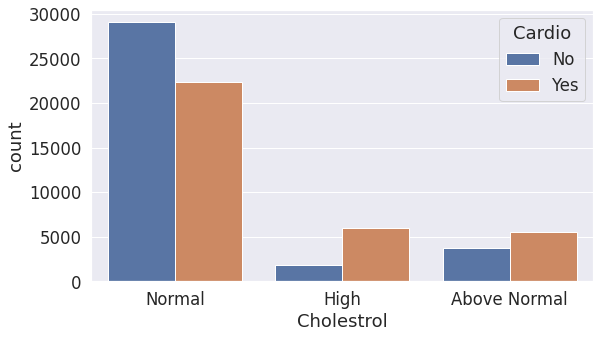

In [ ]:
# Checking the data based on Cholesterol
from matplotlib import rcParams
sb.set(font_scale=1.5)  
rcParams['figure.figsize'] = 9, 5
sb.countplot(x='Cholestrol', hue='Cardio', data = cardio)

**Comment:** From the above plot we can see that cholesterol has great impact on the Cardio variable.

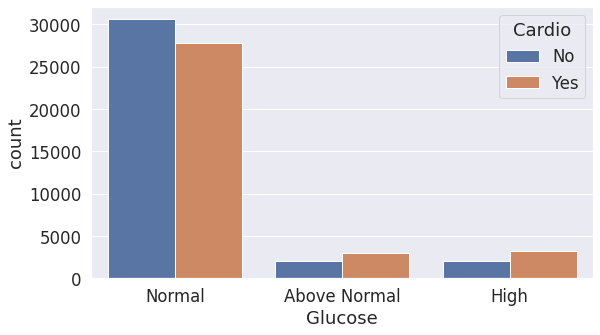

In [ ]:
# Checking the data based on Glucose
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 5
sb.countplot(x='Glucose', hue='Cardio', data = cardio)

**Comment:** Similar to cholesterol, a person with high glucose levels is also more prone to have get cardio vascular disease. So, Diabetic people should be very careful.

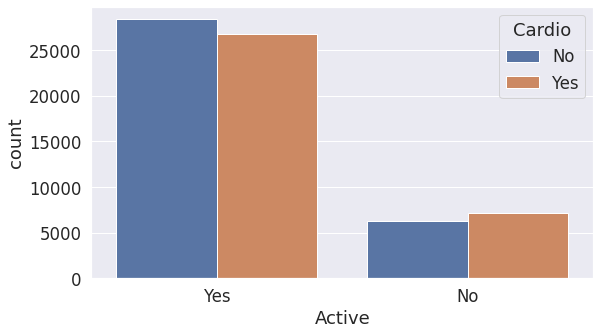

In [ ]:
# Checking the data based on Active
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 5
sb.countplot(x='Active', hue='Cardio', data = cardio)

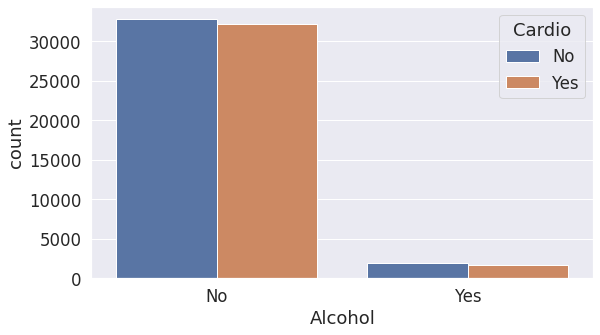

In [ ]:
# Checking the data based on Alcohol
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 5
sb.countplot(x='Alcohol', hue='Cardio', data = cardio)

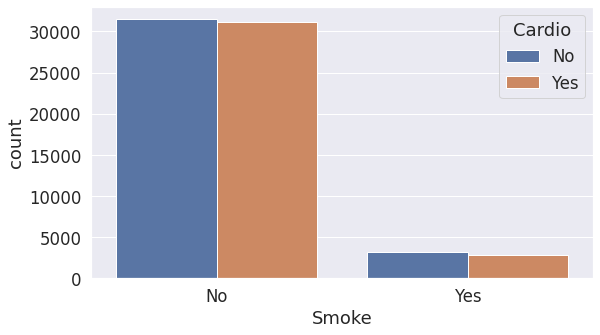

In [ ]:
# Checking the data based on Smoke
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 5
sb.countplot(x='Smoke', hue='Cardio', data = cardio)

 # 5. Data Pre-Processing for Model Building

 Now that are dataset is cleaned from outlitles, we need to swithi back the categorical data to numerical. In order to user ML classifier the cleaned data need to be in the expected data type.

In [ ]:
# Replacing the gender
cardioWithNumber = cardio
cardioWithNumber['Gender'].replace('Female', 0, inplace=True)
cardioWithNumber['Gender'].replace('Male', 1, inplace = True)
# Replacing the cholesterol 
cardioWithNumber['Cholestrol'].replace('Normal', 1, inplace=True)
cardioWithNumber['Cholestrol'].replace('Above Normal', 2, inplace=True)
cardioWithNumber['Cholestrol'].replace('High', 3, inplace=True)
# Replacing the glucose
cardioWithNumber['Glucose'].replace( 'Normal', 1, inplace=True)
cardioWithNumber['Glucose'].replace('Above Normal',2,  inplace=True)
cardioWithNumber['Glucose'].replace( 'High', 3, inplace=True)
# Replacing the Smoke
cardioWithNumber['Smoke'].replace( 'No', 0,inplace=True)
cardioWithNumber['Smoke'].replace( 'Yes', 1,inplace=True)
# Replacing the Alcohol
cardioWithNumber['Alcohol'].replace('No',0,  inplace=True)
cardioWithNumber['Alcohol'].replace('Yes',1, inplace=True)
# Replacing the Active
cardioWithNumber['Active'].replace('No',0,  inplace=True)
cardioWithNumber['Active'].replace('Yes',1, inplace=True)
# Replacing the Cardio variable
cardioWithNumber['Cardio'].replace( 'No',0, inplace=True)
cardioWithNumber['Cardio'].replace( 'Yes',1, inplace=True)

## 5.1 Scaling the data / Fit and training selecting

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn import model_selection

X = cardioWithNumber.drop(['Cardio',  'Active', 'Height (cm)',	'Weight (kg)', 'Height (ft)'  ], axis=1) 
y = cardioWithNumber['Cardio'].values

X_train1, X_test1, Y_train, Y_test = model_selection.train_test_split(X, y,  test_size=0.3, random_state= 123)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train1)
X_test = sc.transform(X_test1)

## 5.2 Fitting and Running differents models

Let's have a battle of running multiples classifiers to see which modeL is the most suitable for this type of data  and obtain a better accuracy




In [ ]:
from sklearn.metrics import r2_score
def getRelativeRsquareRank(r):
  msg = ''
  if r > 0.9 and r <= 1:
    msg = '[****] Model is Almost Perfect'
  elif r >= 0.5 and r <= 0.9:
    msg = '[***] Model is Acceptable'
  elif r >= 0 and r < 0.5:
    msg = '[**] Model does NOT do better than just predicting the Average'
  elif r < 0 :
    msg = '[*] Model does WORSE than predicting the average.'
  return msg +  ' : ' + str(r)

# Taken from
# https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8
def getCorrelationRank(r):
  msg = ''
  if r > 0.9 and r <= 1:
    msg = '[+++++] Very high positive correlation'
  elif r >= 0.7 and r <= 0.9:
    msg = '[++++] High positive correlation'
  elif r >= 0.5 and r < 0.7:
    msg = '[+++] Moderate positive correlation'
  elif r >= 0.3 and r < 0.5:
    msg = '[++] Low positive correlation'
  elif r >= 0 and r < 0.3:
    msg = '[+] Negligible correlation'
  elif r < -0.9 and r >= -1:
    msg = '[-----] Very high negative correlation'
  elif r <= -0.7 and r >= -0.9:
    msg = '[----] High negative correlation'
  elif r <= -0.5 and r > -0.7:
    msg = '[---] Moderate negative correlation'
  elif r <= -0.3 and r > -0.5:
    msg = '[--] Low negative correlation'
  elif r < 0 and r > -0.3:
    msg = '[-] Negligible correlation'
  return msg +  ' : ' + str(r)
  

In [ ]:
# Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0, penalty='l2', tol=0.01)
    # classifier1 = LogisticRegression(random_state = 0, multi_class='ovr')
classifier1.fit(X_train, Y_train)
# Get R score metrics
train_preds = classifier1.predict(X_train)
val_preds = classifier1.predict(X_test)
print("--------------------------------")
print("[LogisticRegression] Training accuracy is {}".format(classifier1.score(X_train, Y_train) *100.0))
print("[LogisticRegression] Test/Validation accuracy is {}".format(classifier1.score(X_test, Y_test) * 100))
print("[LogisticRegression] The R2 output indicates the model is having a {}".format(getCorrelationRank(round(r2_score(Y_test, val_preds), 2))))
print("[LogisticRegression] The R2oos output indicates the model {}".format(getRelativeRsquareRank(round(r2_score(Y_train, train_preds), 2))))

# Using XGBClassifier -- Xboost classifier
from xgboost import XGBClassifier 
classifier2 = XGBClassifier( learning_rate=0.2, max_delta_step=0,
       max_depth=13, min_child_weight=1, missing=None,
       n_estimators=500, nthread=-1, objective='binary:logistic',
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)
 
classifier2.fit(X_train, Y_train)
# Get R score metrics
train_preds2 = classifier2.predict(X_train)
val_preds2 = classifier2.predict(X_test)

print("--------------------------------")
print("[XGBClassifier] Training accuracy is {}".format(classifier2.score(X_train, Y_train) *100.0))
print("[XGBClassifier] Test/Validation accuracy is {}".format(classifier2.score(X_test, Y_test) * 100))
print("[XGBClassifier] The R2 output indicates the model is having a {}".format(getCorrelationRank(round(r2_score(Y_test, val_preds2), 2))))
print("[XGBClassifier] The R2oos output indicates the model {}".format(getRelativeRsquareRank(round(r2_score(Y_train, train_preds2), 2))))


--------------------------------
[LogisticRegression] Training accuracy is 72.65799062988027
[LogisticRegression] Test/Validation accuracy is 72.65704707768546
[LogisticRegression] The R2 output indicates the model is having a [-] Negligible correlation : -0.09
[LogisticRegression] The R2oos output indicates the model [*] Model does WORSE than predicting the average. : -0.09
--------------------------------
[XGBClassifier] Training accuracy is 91.93128578865173
[XGBClassifier] Test/Validation accuracy is 69.77602876159938
[XGBClassifier] The R2 output indicates the model is having a [-] Negligible correlation : -0.21
[XGBClassifier] The R2oos output indicates the model [***] Model is Acceptable : 0.68


#### Comment from the output of the last models
 ***LogisticRegression VS XGBClassifier*** Fitting the data Xboost classifier with a learning rate of 0.2 and a lot of estimators makes the model to learn and adapt a slow. Nonetheless, the result is prominent.  Battles again the LogisticRegression model were run. But XGBClassifier looks that is acceptable for this data.  

The model looks is neither overfitting nor underfitting. Well maybe underfitting a little bit, but it is the best relationship between training and testing accuracies so far obtained. Nonetheless the correlation need to be improved.


# Additional Models testing

## Decision Tree Classifier

In [ ]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(" Train Accuracy =", acc_decision_tree)
acc_test_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
print(" Test Accuracy =", acc_test_decision_tree)

 Train Accuracy = 97.11
 Test Accuracy = 64.03


## Support Vector Classifier

In [ ]:
from sklearn import svm
from sklearn import metrics
svm_clf = svm.SVC(kernel='sigmoid', C=0.2, max_iter=10)
svm_clf.fit(X_train, Y_train)
y_pred = svm_clf.predict(X_test)
print("Training Accuracy =", svm_clf.score(X_train, Y_train))
print("Test Accuracy =", svm_clf.score(X_test, Y_test))
print("Accuracy =", metrics.accuracy_score(Y_test, y_pred))

Training Accuracy = 0.5036959916710047
Test Accuracy = 0.5058057620366322
Accuracy = 0.5058057620366322


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=12, criterion='gini', min_samples_split=3)
rf_clf.fit(X_train, Y_train)
y1_pred = rf_clf.predict(X_test)
print("Training Accuracy =", rf_clf.score(X_train, Y_train))
print("Test Accuracy =", rf_clf.score(X_test, Y_test))
print("Accuracy =", metrics.accuracy_score(Y_test, y1_pred))

Training Accuracy = 0.7254554919312858
Test Accuracy = 0.7289510761307876
Accuracy = 0.7289510761307876


# Neuronal networks
Let's also run a Neuronal network to validate if it works better or not

In [ ]:
#CReate X and Y datasets for training 
from sklearn.model_selection import train_test_split
from sklearn import model_selection

X_NN = cardioWithNumber.drop(['Cardio',  'Active', 'Height (cm)',	'Weight (kg)', 'Height (ft)'  ], axis=1) 
y_NN = cardioWithNumber['Cardio'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_NN, y_NN,  test_size=0.9)


In [ ]:
#Convert data to categorical labels
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import classes
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

from tensorflow.keras.optimizers import Adam
classes = 2
# Create model
model=Sequential()
model.add(Dense((9 *2) ,input_dim = 9, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(9, kernel_initializer = 'normal', activation = 'relu'))
# # model.add(Dense(2, activation = 'softmax'))
# model.add(Dense(1, activation='sigmoid')) # We expected only wheter is 0 or 1 , a not or yes
# first (and only) set of FC => RELU layers
model.add(Dense(9))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))
  

# Compile model

adam = Adam(lr=0.001)
model.compile(loss= 'categorical_crossentropy',optimizer = adam, metrics = ['accuracy'])

history = model.fit(X_train,Y_train, epochs = 20, batch_size = 10, verbose = 1)


Epoch 1/20
686/686 [==============================] - 1s 2ms/step - loss: 0.6442 - accuracy: 0.6353
Epoch 2/20
686/686 [==============================] - 2s 2ms/step - loss: 0.6030 - accuracy: 0.6761
Epoch 3/20
686/686 [==============================] - 2s 3ms/step - loss: 0.6059 - accuracy: 0.6818
Epoch 4/20
686/686 [==============================] - 2s 2ms/step - loss: 0.6024 - accuracy: 0.6759
Epoch 5/20
686/686 [==============================] - 2s 2ms/step - loss: 0.6106 - accuracy: 0.6789
Epoch 6/20
686/686 [==============================] - 2s 2ms/step - loss: 0.6054 - accuracy: 0.6800
Epoch 7/20
686/686 [==============================] - 2s 2ms/step - loss: 0.6050 - accuracy: 0.6800
Epoch 8/20
686/686 [==============================] - 1s 2ms/step - loss: 0.6059 - accuracy: 0.6759
Epoch 9/20
686/686 [==============================] - 2s 2ms/step - loss: 0.6076 - accuracy: 0.6789
Epoch 10/20
686/686 [==============================] - 2s 2ms/step - loss: 0.6050 - accuracy: 0.6784

## 5.3 Model winner and conclusions

</br>
</br>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>
<body>

<table style="width:80%">
  <tr>
    <th>Model Name</th>
    <th> Test Accuracy</th> 
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>72.65%</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>64.09%</td>
  </tr>
  <tr>
    <td>Support Vector Machine</td>
      <td>50.58%</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>72.98%</td>
  </tr>
  <tr>
    <td>Neural Network</td>
     <td>72.42%</td>
  </tr>
</table>

</body>
</html>


After testing with multiples classifiers and even using a Neuronal network, we conclude that the `RandomForestClassifier` is the model that predicts better. The percentage for the final accuracies reaches 72.98%. Nonetheless, the out of samples accuracies is under 70% indicating underfitting. We want to base our forecast output based on the training data set for the model. 

With that being set, now this model is selected to start making real forecasting in the next simulator.


In [ ]:
df4 = cardioWithNumber[cardioWithNumber['Cardio'] == 1]
df4.mean()

Age_in_years     54.963558
Gender            0.352021
Height (cm)     164.296665
Weight (kg)      76.689512
Ap_hi           133.896300
Ap_lo            84.550819
Cholestrol        1.516557
Glucose           1.277545
Smoke             0.083314
Alcohol           0.051379
Active            0.788239
Cardio            1.000000
Height (ft)       5.390311
BMI              28.467236
dtype: float64


---
#6. Live testing
Enable live testing where the user can insert certain inputs and then calculate the diagnosed probability



<img src="https://miro.medium.com/max/6764/1*M9XRknDCt2mrQYN0Yh30OA.png" width=200 align="center">




Please provide all the patient information to forecast the cardiovascular disease

In [ ]:
_age = 60 #@param {type:"number"}
_systolic_blood_pressure_level =  182#@param {type:"number"}
_diastolic_blood_presure_level =  150#@param {type:"number"}
_height_in_ft = 5.4 #@param {type:"number"}
_weight_in_kg =  90#@param {type:"number"}
_cholestrol_level = "High" #@param ["Normal", "Above Normal", "High"]
_glucouse_level = "High" #@param ["Normal", "Above Normal", "High"]
_gender = "Female" # @param ["Male", "Female"]
_person_smoke = "Yes" #@param ["No", "Yes"]
_alchohol = "Yes" #@param ["No", "Yes"]
_considered_an_active_person = "No" #@param ["No", "Yes"]

_ap_high_level= _systolic_blood_pressure_level
_ap_low_level =  _diastolic_blood_presure_level

# ----------- Let's apply the reverse engineering ------------------
_bmi= _weight_in_kg /((_height_in_ft *0.3048)**2)
# # [on_true] if [expression] else [on_false]
if _gender ==  "Male":
  _gender = 1
else:
  _gender = 0

if _person_smoke ==  "No":
  _person_smoke = 0
else:
  _person_smoke = 1

if _alchohol ==  "No":
  _alchohol = 0
else:
  _alchohol = 1

if _considered_an_active_person ==  "No":
  _considered_an_active_person = 0
else:
  _considered_an_active_person = 1

if _cholestrol_level ==  "Normal":
  _cholestrol_level = 1
elif _cholestrol_level ==  "Above Normal":
  _cholestrol_level = 2
else:
  _cholestrol_level = 3

if _glucouse_level ==  "Normal":
  _glucouse_level = 1
elif _glucouse_level ==  "Above Normal":
  _glucouse_level = 2
else:
  _glucouse_level = 3

given_inputs = [_age,   _gender, _ap_high_level,  _ap_low_level,  _cholestrol_level,   _glucouse_level,  _person_smoke,   _alchohol, _bmi ]
df_given = pd.DataFrame([given_inputs],  columns =['Age_in_years', 'Gender',   'Ap_hi',  'Ap_lo',   'Cholestrol',   'Glucose' ,'Smoke' ,    'Alcohol' ,   'BMI' , ]) 



y_pred_abc = decision_tree.predict(df_given)
_result = y_pred_abc.astype(int)

y_pred_abc_2 = rf_clf.predict(df_given)
_result2 = y_pred_abc_2.astype(int)

df_given_3 = pd.DataFrame([given_inputs],  columns =['f0', 'f1',   'f2',  'f3',   'f4',   'f5' ,'f6' ,    'f7' ,   'f8'  ]) 
y_pred_abc_3 = classifier2.predict(df_given_3)
_result3 = y_pred_abc_3.astype(int)

y_pred_abc_4 = model.predict(df_given)
_result4 = y_pred_abc_4

if _result[0] == 0:
  _result = "NEGATIVE"
else:
  _result = "POSITIVE"

if _result2[0] == 0:
  _result2 = "NEGATIVE"
else:
  _result2 = "POSITIVE"

if _result3[0] == 0:
  _result3 = "NEGATIVE"
else:
  _result3 = "POSITIVE"

# import numpy as np
# a = np.array(_result4) # NumPy array
# i = a.tolist()
# i.index(1)
# if _result4[0] > _result4[0]:
#   _result4 = "NEGATIVE"
# else:
#   _result4 = "POSITIVE"

print("-----------------------------------------------------------------------------------------")
print("-------------------------------- Live testing result -------------------------------------")
print("With the given values forescast output for having cardiovascular disease is:")
# print("[Decision tree model] ->  " + _result)
print("[Random Forest Classifier Prediction] ->  " + _result2)
# print("[X boost Classifier] ->  " + _result3)
# print("[CNN] ->" )
# print(_result4)
# print("[Conventional neural networks] -> NEGATIVE:   " + y_pred_abc_4[0])
# print("[Conventional neural networks] -> POSITIVE:   " + y_pred_abc_4[1])
# print("[Conventional neural networks] -> POSITIVE:   " + _result4)
print("-----------------------------------------------------------------------------------------")
print('Given dataframe ->>>')
print(round(df_given.T,0))

-----------------------------------------------------------------------------------------
-------------------------------- Live testing result -------------------------------------
With the given values forescast output for having cardiovascular disease is:
[Random Forest Classifier Prediction] ->  POSITIVE
-----------------------------------------------------------------------------------------
Given dataframe ->>>
                  0
Age_in_years   60.0
Gender          0.0
Ap_hi         182.0
Ap_lo         150.0
Cholestrol      3.0
Glucose         3.0
Smoke           1.0
Alcohol         1.0
BMI            33.0
